<a href="https://colab.research.google.com/github/varsharaodevaraj/job-data-analysis/blob/main/DA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from google.colab import files
uploaded = files.upload()

Saving jobs.csv to jobs (1).csv


In [150]:
import pandas as pd

In [151]:
# Load the Dataset
df = pd.read_csv('jobs.csv')

In [152]:
df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


---- Data Analysis steps ----

-- Data Exploration:
1.  Explore the data
4.  Null values
5.  Duplicate values
2.  Column Exploration
3.  Data types

-- Data Cleaning:
1.  Dealing with NULL VALUES
2.  Dealing with DUPLICATES
3.  Cleaning COLUMNS
4.  Removing cols if necessary

-- Analysing the data : questions for analysis

1. DATA EXPLORATION


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [154]:
df.describe() # works on numeric cols

,job_id,rating
count,7.866700e+04,42948.000000
mean,1.255071e+11,3.940144
std,1.097464e+11,0.519211
min,1.012200e+10,1.000000
25%,4.012350e+10,3.700000
50%,6.012350e+10,4.000000
75%,2.610226e+11,4.200000
max,3.112229e+11,5.000000


In [155]:
# null values:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


1.1 - CHECK NULL VALUES

In [156]:
df.isnull().sum().sum()

np.int64(79714)

In [157]:
df.shape

(79147, 12)

1.2 - CHECK DUPLICATE VALUES

In [158]:
df.duplicated(subset='job_id').sum()
# df['job_id'].duplicated().sum()

np.int64(6137)

1.3 - REMOVE COLS

In [159]:
df.columns

Index(['job_id', 'job_role', 'company', 'experience', 'salary', 'location',
       'rating', 'reviews', 'resposibilities', 'posted_on', 'job_link',
       'company_link'],
      dtype='object')

In [160]:
del df['posted_on']
del df['job_link']
del df['company_link']

2. DATA CLEANING:

#### 2.1) Dealing with Null Values

- **Removed Rows:**  
  - Entries with missing values in **`job_id`**, **`resposibilities`**, and **`company`** were completely removed.  

- **Imputed Values:**  
  - **Experience:** Missing values filled with  **`5-10 Yrs`**  
  - **Location:** Missing values filled with  **`Bangalore/Bengaluru`**  
  - **Rating:** Missing values filled with  **`0.0`** (indicating no rating)  
  - **Reviews:** Missing values filled with  **`0 Reviews`**  

These steps ensure a cleaner and more consistent dataset for analysis.  

In [161]:
df['job_role'].unique()
len(df['job_role'].unique())

51051

In [162]:
df['job_role'].value_counts()

,count
job_role,
Business Development Executive,305
Solution Architect,278
Customer Service Associate,277
Sales Executive,275
.Net Fullstack Developer,258
...,...
"Outbound Sales Executive, Telecaller Voice Process",1
Account executive (US Payroll),1
"Urgent Vacancy Telesales Executive, Telecaller",1


In [163]:
df['company'].unique()

array(['Hdfc Bank', 'Accenture', 'Mindtree', ..., 'Connecting Talent',
       'Entrivis Tech', 'Ig3 Infra'], dtype=object)

In [164]:
df['company'].nunique()

15313

In [165]:
df['company'].value_counts()

,count
company,
Lavya Associates,5131
Accenture,4446
Tech Mahindra,1285
Varite India Pvt. Ltd.,882
Hucon,852
...,...
Dua Solutions,1
Sheeba Medical Services,1
CONNECTING TALENT,1


2.1 DEALING WITH NULL VALUES:


In [166]:
df = df.dropna(subset=['job_id','company','resposibilities'])

In [167]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,1268
salary,0
location,1226
rating,35718
reviews,35718
resposibilities,0


In [168]:
df['experience'].value_counts()

,count
experience,
5-10 Yrs,8039
3-8 Yrs,4450
1-6 Yrs,3302
4-9 Yrs,3186
2-7 Yrs,3077
...,...
20-26 Yrs,1
22-28 Yrs,1
19-24 Yrs,1


In [169]:
df['experience'] = df['experience'].fillna('5-10 Yrs')

In [170]:
df['location'].value_counts()

,count
location,
Bangalore/Bengaluru,10027
Hyderabad/Secunderabad,3736
Pune,3216
Chennai,2953
Mumbai,2818
...,...
"Udaipur, Lucknow, Jammu, Jodhpur",1
"Kolkata, Bareilly, Rudrapur, Haldwani, Jamshedpur, Nainital, Pilibhit",1
"Kota, Ahmedabad, Chennai",1


In [171]:
df['location'] = df['location'].fillna('Bangalore/Bengaluru')

In [172]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,35718
reviews,35718
resposibilities,0


In [173]:
df['rating'] = df['rating'].fillna(0.0)

In [174]:
df['reviews'] = df['reviews'].fillna('0 Reviews')

In [175]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,0
reviews,0
resposibilities,0


In [176]:
df.isnull().sum().sum()

np.int64(0)

2.2 DEAL WITH DUPLIACTES


In [177]:
df = df.drop_duplicates(subset='job_id')

In [178]:
df.shape

(72988, 9)

In [179]:
df.duplicated().sum()

np.int64(0)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72988 entries, 0 to 73766
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           72988 non-null  float64
 1   job_role         72988 non-null  object 
 2   company          72988 non-null  object 
 3   experience       72988 non-null  object 
 4   salary           72988 non-null  object 
 5   location         72988 non-null  object 
 6   rating           72988 non-null  float64
 7   reviews          72988 non-null  object 
 8   resposibilities  72988 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.6+ MB


2.3 Change the datatype of job_id

In [181]:
df['job_id'] = df['job_id'].astype('int').astype('str')

2.4 Clean Experience Column


In [182]:
df['experience']

,experience
0,1-6 Yrs
1,11-15 Yrs
2,3-7 Yrs
3,3-7 Yrs
4,5-7 Yrs
...,...
73762,1-5 Yrs
73763,1-5 Yrs
73764,1-4 Yrs
73765,0-2 Yrs


In [183]:
for i in df['experience'][:10]:
  print(i,type(i))

1-6 Yrs <class 'str'>
11-15 Yrs <class 'str'>
3-7 Yrs <class 'str'>
3-7 Yrs <class 'str'>
5-7 Yrs <class 'str'>
5-10 Yrs <class 'str'>
5-10 Yrs <class 'str'>
7-12 Yrs <class 'str'>
2-6 Yrs <class 'str'>
3-7 Yrs <class 'str'>


In [184]:
for i in df['experience'][:10]:
  print(i.replace('Yrs','').split('-')[0].strip(),end='-')
  print(i.replace('Yrs','').split('-')[-1].strip())

# the altenate and best approach of doing this is below

1-6
11-15
3-7
3-7
5-7
5-10
5-10
7-12
2-6
3-7


In [185]:
df['min_exp'] = df['experience'].str.replace('Yrs','').str.split('-').str[0].str.strip().astype('int')

In [186]:
df['min_exp']

,min_exp
0,1
1,11
2,3
3,3
4,5
...,...
73762,1
73763,1
73764,1
73765,0


In [187]:
df['max_exp'] = df['experience'].str.replace('Yrs','').str.split('-').str[-1].str.strip().astype('int')

In [188]:
df['max_exp']

,max_exp
0,6
1,15
2,7
3,7
4,7
...,...
73762,5
73763,5
73764,4
73765,2


2.5 CLEANING SALARY COL

In [189]:
df['salary']

,salary
0,Not disclosed
1,Not disclosed
2,Not disclosed
3,Not disclosed
4,Not disclosed
...,...
73762,"7,00,000 - 8,50,000 PA."
73763,"7,00,000 - 8,50,000 PA."
73764,"3,00,000 - 4,50,000 PA."
73765,Not disclosed


In [191]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()

In [196]:
df['clean_salary']

,clean_salary
0,Not disclosed
1,Not disclosed
2,Not disclosed
3,Not disclosed
4,Not disclosed
...,...
73762,700000
73763,700000
73764,300000
73765,Not disclosed


In [199]:
df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()

In [201]:
del df['clean_salary']

In [202]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()

In [203]:
df['clean_salary']

,clean_salary
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
73762,850000
73763,850000
73764,450000
73765,NaN


In [204]:
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')

In [205]:
del df['clean_salary']

In [206]:
df['max_salary']

,max_salary
0,Not disclosed
1,Not disclosed
2,Not disclosed
3,Not disclosed
4,Not disclosed
...,...
73762,850000
73763,850000
73764,450000
73765,Not disclosed


In [207]:
del df['salary']
del df['experience']

In [208]:
df.head()

,job_id,job_role,company,location,rating,reviews,resposibilities,min_exp,max_exp,min_salary,max_salary
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1,6,Not disclosed,Not disclosed
1,60123905908,Product Owner Senior Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",11,15,Not disclosed,Not disclosed
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
3,60123905897,Employee Relations and Policies Specialist,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
4,60123008332,SAP BO Consultant,Mindtree,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7,Not disclosed,Not disclosed


2.7 CLEAN REVIEWS

In [209]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

In [210]:
df['reviews']

,reviews
0,39110
1,32129
2,32129
3,32129
4,3759
...,...
73762,0
73763,0
73764,0
73765,3


In [211]:
df.head()

,job_id,job_role,company,location,rating,reviews,resposibilities,min_exp,max_exp,min_salary,max_salary
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,"Customer Service,Sales,Relationship Management",1,6,Not disclosed,Not disclosed
1,60123905908,Product Owner Senior Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Product management,Market analysis,Change mana...",11,15,Not disclosed,Not disclosed
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
3,60123905897,Employee Relations and Policies Specialist,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
4,60123008332,SAP BO Consultant,Mindtree,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7,Not disclosed,Not disclosed


3. DATA ANALYSIS

In [212]:
print(len(df), ': Total jobs')

72967 : Total jobs


In [213]:
print(df['company'].nunique(),': Total companies')

15310 : Total companies


3.1 - Top 5 Companies (By Reviews)

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
top_5_companies = df.groupby('company')['reviews'].sum().sort_values(ascending=False).head(5).reset_index()

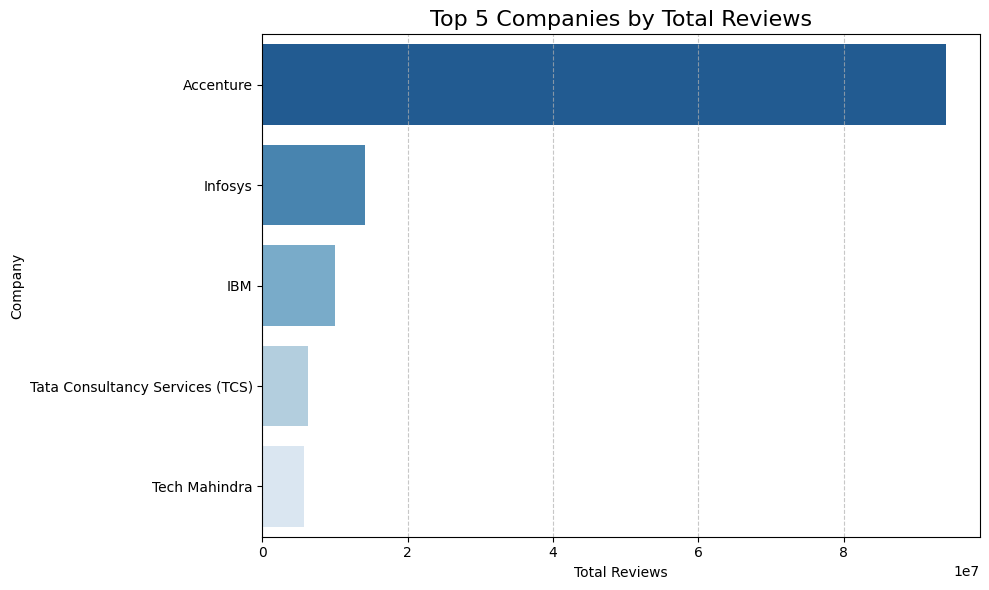

In [216]:
plt.figure(figsize=(10,6))
sns.barplot(x='reviews',y='company',data=top_5_companies, palette='Blues_r')

plt.xlabel('Total Reviews')
plt.ylabel('Company')
plt.title('Top 5 Companies by Total Reviews', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

3.3 - Companies Hiring for Data Analyst

In [221]:
print(len(df[df['job_role'] == 'Data Analyst']))

59


3.4 - Skills needed for almost all the jobs

In [222]:
df.head()

,job_id,job_role,company,location,rating,reviews,resposibilities,min_exp,max_exp,min_salary,max_salary
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,"Customer Service,Sales,Relationship Management",1,6,Not disclosed,Not disclosed
1,60123905908,Product Owner Senior Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Product management,Market analysis,Change mana...",11,15,Not disclosed,Not disclosed
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
3,60123905897,Employee Relations and Policies Specialist,Accenture,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
4,60123008332,SAP BO Consultant,Mindtree,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7,Not disclosed,Not disclosed


In [223]:
resposibilities_cnt = df['resposibilities'].str.split(',').explode().value_counts().reset_index()

In [225]:
resposibilities_cnt.head(10)

,resposibilities,count
0,Sales,4623
1,tied,3310
2,agency,3307
3,communication,2555
4,training,2218
5,Consulting,2101
6,Customer Service,2009
7,Java,1976
8,Business Development,1968
9,team handling,1953


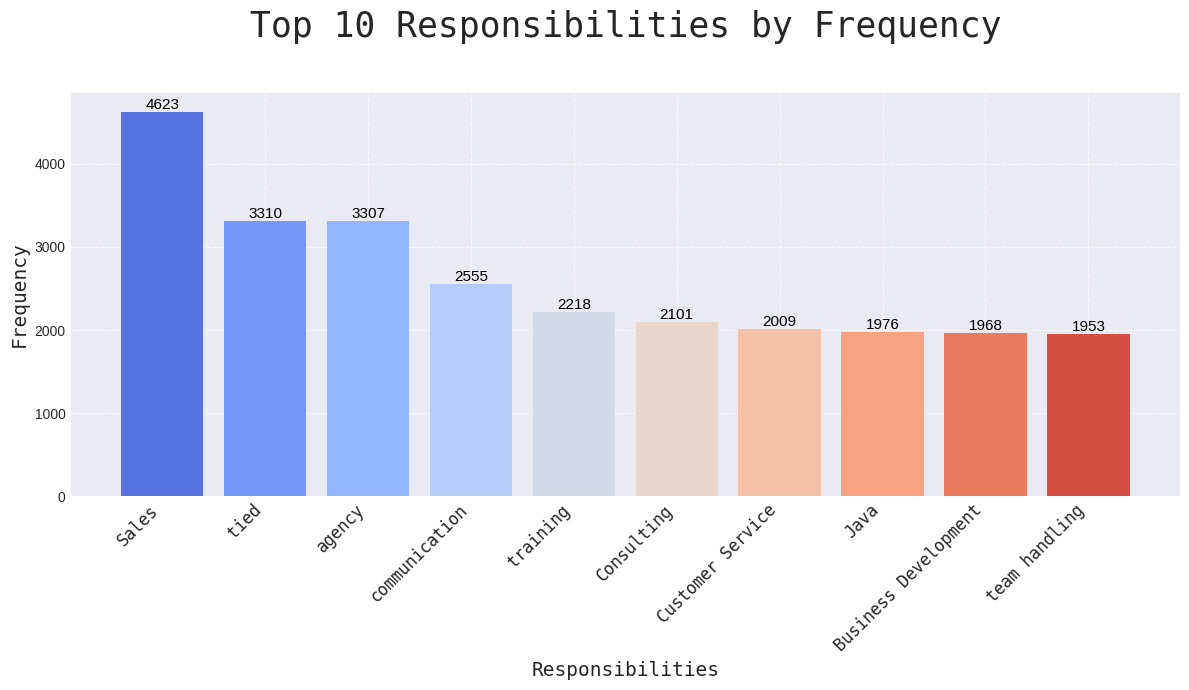

In [229]:
resposibilities_cnt.columns = ['responsibility', 'count']

top_10 = resposibilities_cnt.head(10)

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 7))
bars = plt.bar(top_10['responsibility'], top_10['count'],
               color=sns.color_palette("coolwarm", len(top_10)))

plt.title('Top 10 Responsibilities by Frequency', fontsize=25, fontname='monospace', pad=40)
plt.xlabel('Responsibilities', fontsize=14, fontname='monospace')
plt.ylabel('Frequency', fontsize=14, fontname='monospace')

plt.xticks(rotation=45, ha='right', fontsize=12, fontname='monospace')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=11, color='black')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()